In [3]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Import Dataset
data = pd.read_csv("C:\\Users\\varroju\\OneDrive - DXC Production\\Documents\\My\\My Learning\\DXC - Data Science\\Regression\\Python Practice\\Regression Analysis\\Regression Analysis for Business Managers in Python and R templates\\Linear Regression\\houses_to_rent.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6080 entries, 0 to 6079
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      6080 non-null   int64 
 1   city            6080 non-null   int64 
 2   area            6080 non-null   int64 
 3   rooms           6080 non-null   int64 
 4   bathroom        6080 non-null   int64 
 5   parking spaces  6080 non-null   int64 
 6   floor           6080 non-null   object
 7   animal          6080 non-null   object
 8   furniture       6080 non-null   object
 9   hoa             6080 non-null   object
 10  rent amount     6080 non-null   object
 11  property tax    6080 non-null   object
 12  fire insurance  6080 non-null   object
 13  total           6080 non-null   object
dtypes: int64(6), object(8)
memory usage: 665.1+ KB


In [4]:
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [5]:
# Forming dataset
dataset = data.loc[:,['city', 'area', 'rooms','bathroom','parking spaces','floor','animal','furniture', 'rent amount']]

# Look at the data structure
dataset.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
rent amount       object
dtype: object

In [7]:
# Transforming animal and furniture into numeric
dataset[['animal', 'furniture']] = pd.get_dummies(dataset[['animal', 'furniture']],drop_first = True)
dataset.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal             uint8
furniture          uint8
rent amount       object
dtype: object

In [8]:
dataset

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,-,0,0,"R$8,000"
1,0,64,2,1,1,10,0,1,R$820
2,1,443,5,5,4,3,0,0,"R$7,000"
3,1,73,2,2,1,12,0,1,"R$1,250"
4,1,19,1,1,0,-,1,1,"R$1,200"
...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,0,1,"R$1,150"
6076,1,84,2,2,1,16,1,0,"R$2,900"
6077,0,48,1,1,0,13,0,1,R$950
6078,1,160,3,2,2,-,1,1,"R$3,500"


In [9]:
# Transform floor into numeric
dataset['floor'] = np.where(dataset['floor'] == '-' , 0, dataset['floor'] )
dataset['floor'] = dataset['floor'].astype(int)
dataset

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,0,0,"R$8,000"
1,0,64,2,1,1,10,0,1,R$820
2,1,443,5,5,4,3,0,0,"R$7,000"
3,1,73,2,2,1,12,0,1,"R$1,250"
4,1,19,1,1,0,0,1,1,"R$1,200"
...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,0,1,"R$1,150"
6076,1,84,2,2,1,16,1,0,"R$2,900"
6077,0,48,1,1,0,13,0,1,R$950
6078,1,160,3,2,2,0,1,1,"R$3,500"


In [10]:
# Transform dependent variables
dataset['rent amount'] = dataset['rent amount'].str.replace(',', '')
dataset['rent amount'] = dataset['rent amount'].str.replace('R', '')
dataset['rent amount'] = dataset['rent amount'].str.replace('$', '')
dataset['rent amount'] = dataset['rent amount'].astype(float)
dataset

C:\Users\varroju\AppData\Local\Temp\ipykernel_13680\1517564828.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset['rent amount'] = dataset['rent amount'].str.replace('$', '')


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
0,1,240,3,3,4,0,0,0,8000.0
1,0,64,2,1,1,10,0,1,820.0
2,1,443,5,5,4,3,0,0,7000.0
3,1,73,2,2,1,12,0,1,1250.0
4,1,19,1,1,0,0,1,1,1200.0
...,...,...,...,...,...,...,...,...,...
6075,1,50,2,1,1,2,0,1,1150.0
6076,1,84,2,2,1,16,1,0,2900.0
6077,0,48,1,1,0,13,0,1,950.0
6078,1,160,3,2,2,0,1,1,3500.0


In [18]:
# Summary of Statistics
pd.set_option('display.max_columns', None)  # To display all columns in output, if truncated.
dataset.describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,rent amount
count,6078.000000,6078.00000,6078.000000,6078.000000,6078.00000,6078.000000,6078.000000,6078.000000,6078.000000
mean,0.863442,145.05051,2.492103,2.341395,1.75617,5.671603,0.232642,0.739717,4395.694965
std,0.343408,128.83480,1.129374,1.438933,1.61176,6.169304,0.422551,0.438825,3576.762053
min,0.000000,10.00000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,420.000000
25%,1.000000,58.00000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,1800.000000
50%,1.000000,100.00000,3.000000,2.000000,1.00000,4.000000,0.000000,1.000000,3111.000000
75%,1.000000,200.00000,3.000000,3.000000,2.00000,9.000000,0.000000,1.000000,5950.000000
max,1.000000,1600.00000,10.000000,10.000000,12.00000,99.000000,1.000000,1.000000,45000.000000


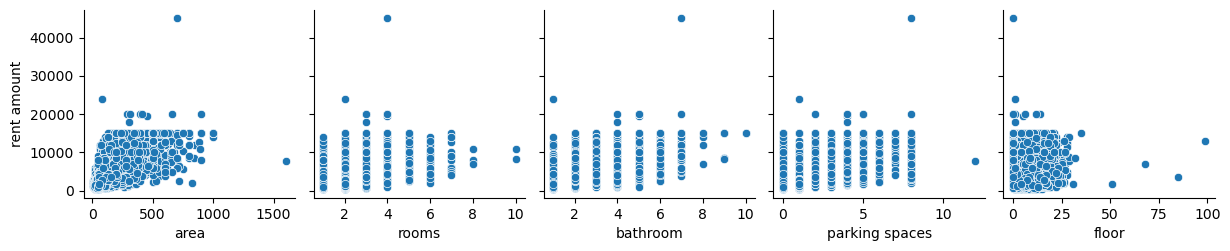

In [19]:
# Plotting continuous variable against the dependent variable.
sns.pairplot(data = dataset, x_vars  = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor'],  y_vars  = ['rent amount'])

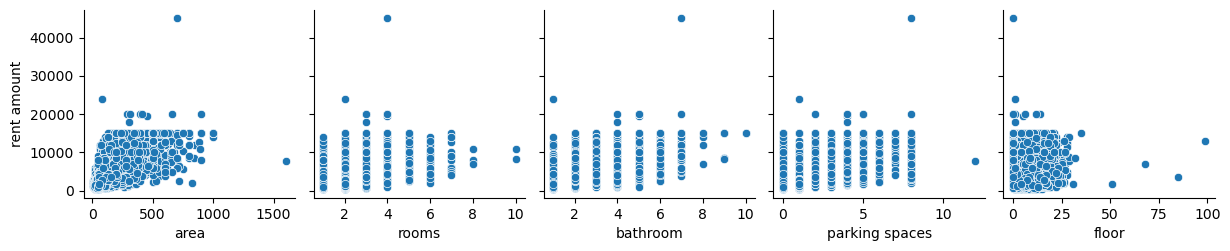

In [20]:
# Remove outliers
dataset = dataset[dataset["area"] < 10000]
sns.pairplot(data = dataset, x_vars  = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor'],  y_vars  = ['rent amount'])

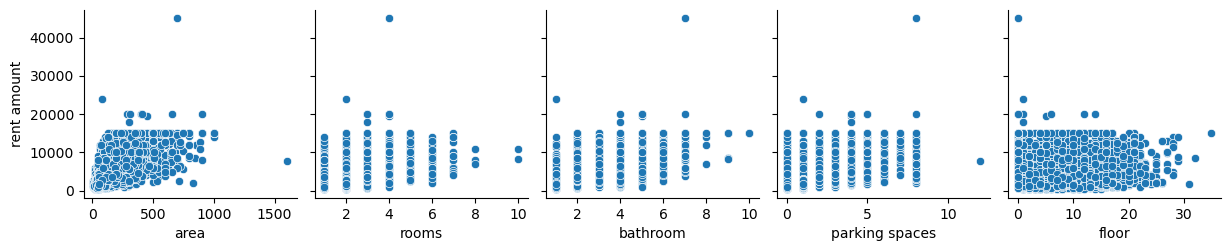

In [21]:
dataset = dataset[dataset["floor"] < 50]
sns.pairplot(data = dataset, x_vars  = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor'],  y_vars  = ['rent amount'])

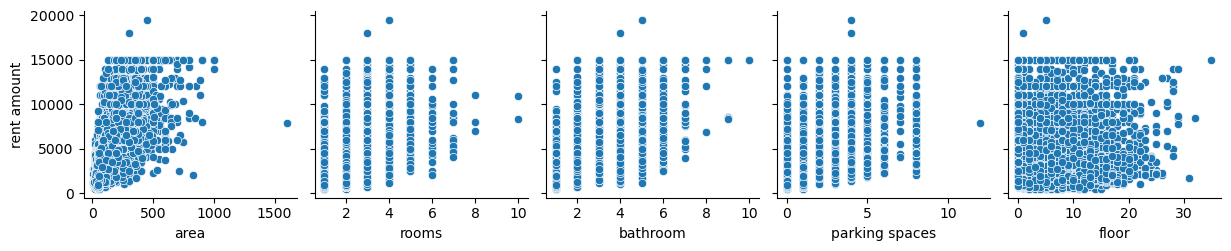

In [22]:
dataset = dataset[dataset["rent amount"] < 20000]
sns.pairplot(data = dataset, x_vars  = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor'],  y_vars  = ['rent amount'])

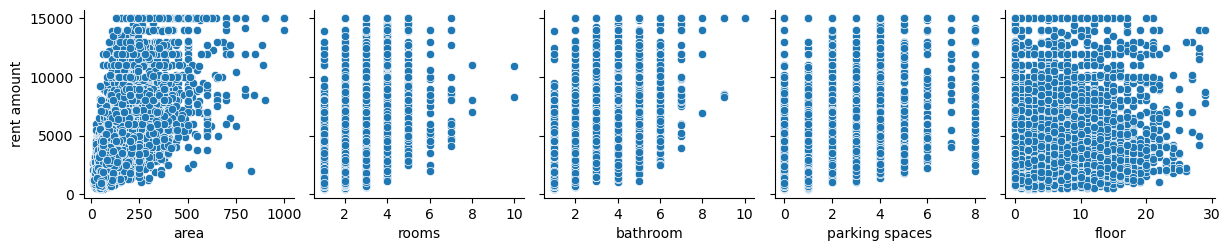

In [23]:
dataset = dataset[dataset["area"] < 1500]
dataset = dataset[dataset["floor"] < 30]
dataset = dataset[dataset["rent amount"] < 16000]
sns.pairplot(data = dataset, x_vars  = ['area', 'rooms', 'bathroom', 'parking spaces', 'floor'],  y_vars  = ['rent amount'])

<Axes: >

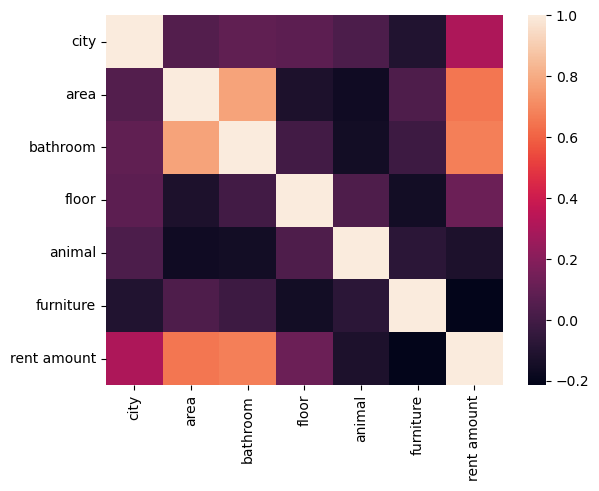

In [28]:
# Correlation Matrix
corr = dataset.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)

In [31]:
# Dropping variables
dataset = dataset.drop(['rooms','parking spaces'], axis =1)
dataset  

KeyError: "['rooms', 'parking spaces'] not found in axis"

In [32]:
# Transform variables into their log form
dataset['rent amount'] = np.log(dataset['rent amount'])
dataset['rent amount']

0       2.195801
1       1.903495
2       2.180832
3       1.964437
4       1.958696
          ...   
6075    1.952675
6076    2.075994
6077    1.925192
6078    2.099308
6079    2.021496
Name: rent amount, Length: 6060, dtype: float64

In [33]:
dataset['area'] = np.log(dataset['area'])
dataset

,city,area,bathroom,floor,animal,furniture,rent amount
0,1,5.480639,3,0,0,0,2.195801
1,0,4.158883,1,10,0,1,1.903495
2,1,6.093570,5,3,0,0,2.180832
3,1,4.290459,2,12,0,1,1.964437
4,1,2.944439,1,0,1,1,1.958696
...,...,...,...,...,...,...,...
6075,1,3.912023,1,2,0,1,1.952675
6076,1,4.430817,2,16,1,0,2.075994
6077,0,3.871201,1,13,0,1,1.925192
6078,1,5.075174,2,0,1,1,2.099308


In [37]:
# Isolate X and Y variables
y = dataset.iloc[:, -1]      # rent amount
y

0       2.195801
1       1.903495
2       2.180832
3       1.964437
4       1.958696
          ...   
6075    1.952675
6076    2.075994
6077    1.925192
6078    2.099308
6079    2.021496
Name: rent amount, Length: 6060, dtype: float64

In [36]:
x = dataset.iloc[:, :-1]      # other than rent amount
x

,city,area,bathroom,floor,animal,furniture
0,1,5.480639,3,0,0,0
1,0,4.158883,1,10,0,1
2,1,6.093570,5,3,0,0
3,1,4.290459,2,12,0,1
4,1,2.944439,1,0,1,1
...,...,...,...,...,...,...
6075,1,3.912023,1,2,0,1
6076,1,4.430817,2,16,1,0
6077,0,3.871201,1,13,0,1
6078,1,5.075174,2,0,1,1


In [38]:
# Linear regression

x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rent amount   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1977.
Date:                Tue, 04 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:13:13   Log-Likelihood:                 8905.4
No. Observations:                6060   AIC:                        -1.780e+04
Df Residuals:                    6053   BIC:                        -1.775e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7066      0.006    272.197      0.000       1.694       1.719
city           0.0672      0.002     31.897      0.000       0.063       0.071
area           0.0666      0.002     43.539      0.000       0.064       0.070
bathroom       0.0136      0.001     16.288      0.000       0.012       0.015
floor          0.0021      0.000     16.701      0.000       0.002       0.002
animal      9.073e-05      0.002      0.052      0.958      -0.003       0.003
furniture     -0.0436      0.002    -26.126      0.000      -0.047      -0.040
==============================================================================
Omnibus:                        2.880   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.837
Skew:                          -0.043   Prob(JB):                        0.242
Kurtosis:                       3.061   Cond. No.                         82.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Create price for my apartment
apartment = [1,1,np.log(72), 1,4,0,1]
price = model.predict(apartment)
price = np.exp(price)
price

array([7.667108])